NanoPyx is a python library that implements the methods available in NanoJ, an ImageJ plugin for super-resolution microscopy image processing.
This notebooks shows how to correct drift during image acquisition.

generate_timelapse_drift took 0.144 seconds


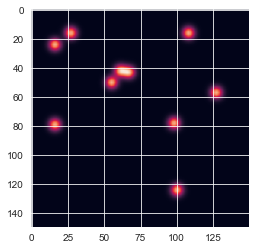

In [1]:
# Imports and test image loading
import nanopyx
import napari
from matplotlib import pyplot as plt

from nanopyx.core.utils.imagegenerator.beads import  generate_timelapse_drift

img = generate_timelapse_drift(shape=(20, 150, 150), drift=3)
plt.imshow(img[0])
#viewer = napari.view_image(image_stack)

To correct the drift and align the image stack, the estimate drift correction method from the library can be used.
This method takes several parameters that can be used to fine tune the alignment but also to control the library behaviour:
- apply: boolean, if true will automatically apply the drift estimation to the image_stack
- ref_option: 0 or 1, if 0 uses always the first frame as reference for alignemnt, if 1 uses the previous frame
- time_averaging: int, number of frames to be averaged for drift calculation, 1 skips averaging
- max_expected_drift: int, maximum number of pixels for alignment
- use_roi: boolean, if true requires a roi to be defined in "roi", calculates drift based only on roi
- roi: (int x0, int y0, int x1, int y1), tuple containing 2 opposing corner coordinates of a rectangle roi

In [2]:
corrected_image = nanopyx.estimate_drift_correction(image_stack, time_averaging=100, max_expected_drift=10, ref_option=0, normalize=True, apply=True)
#corrected_image_layer = napari.add_image(corrected_image)

/Users/bsaraiva/Code/eNanoScoPy/src/enanoscopy/methods/image/transform/fft_helper_functions.py:60: ComplexWarning: Casting complex values to real discards the imaginary part
  pixels_out[p0] = pixels[p1]
/Users/bsaraiva/Code/eNanoScoPy/src/enanoscopy/methods/image/transform/cross_correlation_map.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
  ccm_pixels[i] = value


(5, 105, 105)
Interpolating time points


View image correction in napari

In [3]:
viewer = napari.view_image(corrected_image)
new_layer = viewer.add_image(image_stack, name="corrected image stack")

Drift table is automatically exported as a csv file, however can also be exported as a npy file by setting the method parameter save_as_npy to True:

In [4]:
corrected_image = nanopyx.estimate_drift_correction(image_stack, save_as_npy=False, time_averaging=100, max_expected_drift=10, ref_option=0, normalize=True, apply=True)

/Users/bsaraiva/Code/eNanoScoPy/src/enanoscopy/methods/image/transform/fft_helper_functions.py:60: ComplexWarning: Casting complex values to real discards the imaginary part
  pixels_out[p0] = pixels[p1]
/Users/bsaraiva/Code/eNanoScoPy/src/enanoscopy/methods/image/transform/cross_correlation_map.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
  ccm_pixels[i] = value


(5, 105, 105)
Interpolating time points


To reuse the drift table and directly apply to an image without estimating drift correction first, just use apply_drift_correction method.

In [5]:
corrected_image = nanopyx.apply_drift_correction(image_stack)
new_layer = viewer.add_image(corrected_image, name="corrected with loaded npy")

UnpicklingError: Failed to interpret file '/Users/bsaraiva/Code/eNanoScoPy/src/enanoscopy/images/drift_test.tif' as a pickle

: 